In [1]:
import numpy as np
import umap.umap_ as umap
from sklearn.decomposition import PCA
import ripser.ripser as tda

import matplotlib.pyplot as plt
from persim import plot_diagrams


from methods import *
from plotting_functions import *

## N-gon cells require 2N principal components to be found


In [2]:
ndims = 12
dims = np.arange(1, ndims+1)
angles = 180/np.arange(1,ndims+1)

nx,ny = 10,10 # board size
res = 100

# initialize board
xx, yy = np.meshgrid(np.linspace(-nx/2, nx/2, res), np.linspace(-ny/2, ny/2, res))
board = np.stack([xx, yy], axis=-1)

center = np.zeros(2)
phase_n = 40

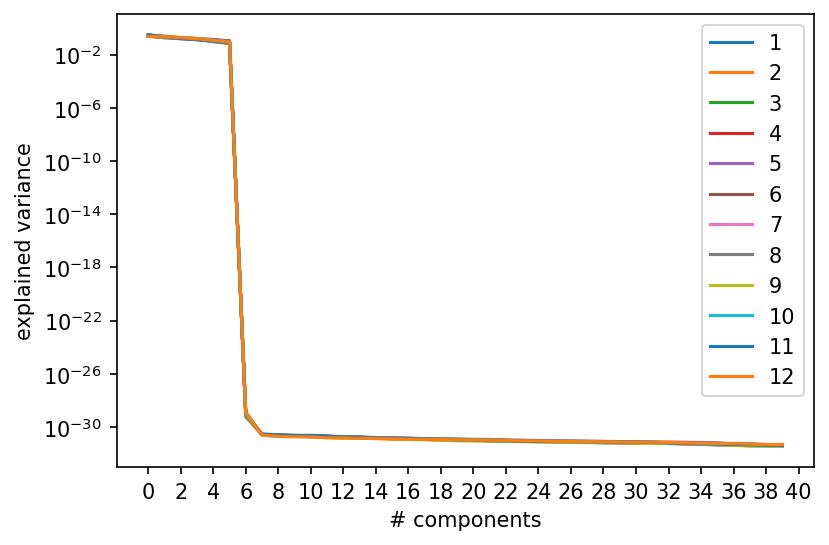

In [3]:
pca_expvars = np.zeros([phase_n, ndims])
example_cells = np.zeros([res,res,ndims])
phoms = []

for n in range(ndims):
    gridmodule = GridModule(center,orientation_offset=0,f=1,rot_theta=angles[n],n_comps=dims[n],non_negative=False)
    phases = np.random.uniform(0,nx,(phase_n,2))-nx/2
    #phases = gridmodule.sample_phase_offsets(phase_n)
    gridmodule.init_module(phases)
    data = gridmodule(board).T
    example_cells[:,:,n] = data[:,:,0]
    data = data.reshape(-1,data.shape[-1])
    PCA_fit = PCA().fit(data)
    pca_expvars[:,n] = PCA_fit.explained_variance_ratio_
    phoms.append(tda(data,maxdim=2,n_perm=150)['dgms'])

plt.figure(dpi=150)
plt.plot(pca_expvars)
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('explained variance')
plt.xlabel('# components')
plt.locator_params(nbins=phase_n,axis='x')
plt.legend(dims)

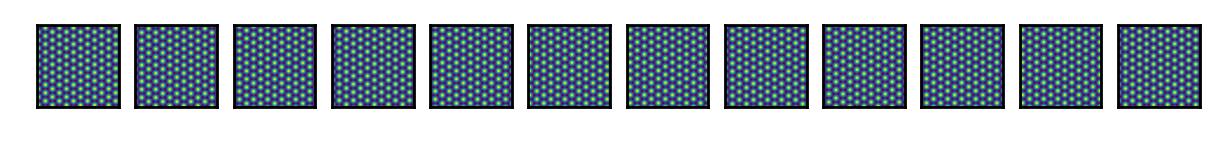

In [4]:
fig, ax = plt.subplots(dpi=250,ncols=ndims)
for i in range(ndims):
    ax[i].imshow(example_cells[:,:,i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])

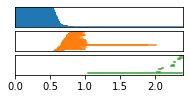

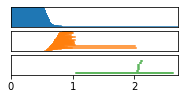

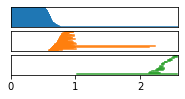

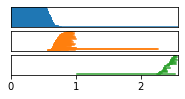

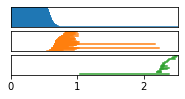

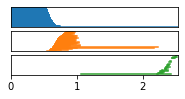

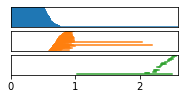

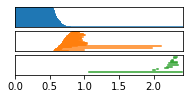

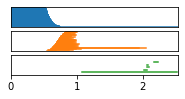

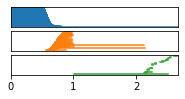

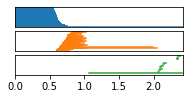

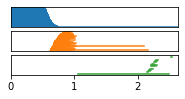

In [5]:
for i in range(ndims):
    try:
        barcode_plot(phoms[i],dims=3)
    except:
        barcode_plot(phoms[i],dims=2)

## The torus appears for very sparse sampling of orientation space

In [8]:
phase_res = np.arange(1,20,2).astype(int)
print(phase_res)

[ 1  3  5  7  9 11 13 15 17 19]


In [9]:
phoms = []

for p in phase_res:
    gridmodule = GridModule(center,orientation_offset=0,f=1,rot_theta=60,n_comps=3,non_negative=False)
    phases = gridmodule.inner_hexagon.sample(3)
    #phases = np.random.uniform(0,nx,(p,2))-nx/2
    gridmodule.init_module(phases)
    data = gridmodule(board).T
    data = data.reshape(-1,data.shape[-1])
    phoms.append(tda(data,maxdim=2,n_perm=150)['dgms'])

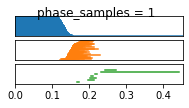

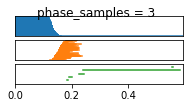

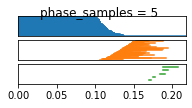

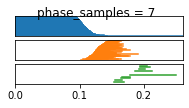

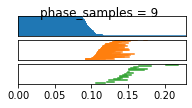

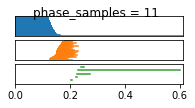

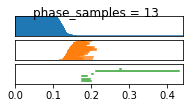

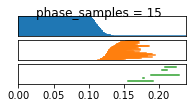

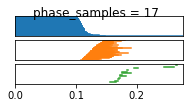

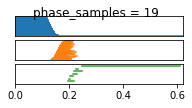

In [10]:
for i in range(len(phase_res)):
    try:
        barcode_plot(phoms[i],dims=3)

    except:
        try:
            barcode_plot(phoms[i],dims=2)
        except:
            barcode_plot(phoms[i],dims=1)
    plt.suptitle('phase_samples = ' + str(phase_res[i]))

### - Try out 3d grid cells with same formula?